Inicializacion

In [201]:
import numpy as np

limite_inferior=-10
limite_superior=10

poblacion=10 #tambien llamadas soluciones del espacio de busqueda
dimensiones=2
rango=limite_superior-limite_inferior
F =  0.4 #Factor de mutación
cr = 0.2 #Probabilidad de cruzamiento
max_iters = 25 #Numero maximo de iteraciones

fitness = np.zeros([10,])  #Para guardar fitness
u = np.zeros([dimensiones,]) #Para calcular vector cruzado

#Inicializacion
x=rango*np.random.rand(poblacion,dimensiones)+limite_inferior

In [172]:
#Función objetivo
###Cambiar función a su funcion correspondiente
def ackley(X):
    d = X.size
    c= 2*np.pi
    b = 0.2
    a = 20

    sum1 = 0
    sum2 = 0

    for i in range(d):
        xi = X[i]
        sum1 = sum1 + xi **2
        sum2 = sum2 + np.cos(c*xi)

    term1 = -a * np.exp(-b * np.sqrt(sum1/d))
    term2 = -np.exp(sum2 / d)

    y = term1 + term2 + a + np.exp(1)
    return y

In [202]:
#Función objetivo
# Función Levy N. 13
def levy(X):
    x1, x2 = X[0], X[1]
    term1 = np.sin(3 * np.pi * x1)**2
    term2 = (x1 - 1)**2 * (1 + np.sin(3 * np.pi * x2)**2)
    term3 = (x2 - 1)**2 * (1 + np.sin(2 * np.pi * x2)**2)
    return term1 + term2 + term3


In [203]:
#Evaluación inicial
for solucion in range(poblacion):
    fitness[solucion] = levy(x[solucion,:])

Proceso iterativo

In [204]:
#### Lista para almacenar el mejor fitness de cada iteración ####
best_fitness_per_iteration = []

# Declaración de la variable para almacenar la mejor solución y su fitness
best_solution = None
best_fitness = float('inf')  # Inicializamos con un valor alto para asegurar el reemplazo

for i in range(max_iters):

    for p in range(poblacion):
        fitness[p] = levy(x[p, :])

        # Actualización de la mejor solución encontrada
        if fitness[p] < best_fitness:
            best_fitness = fitness[p]
            best_solution = x[p, :].copy()  # Guardamos una copia de la mejor solución encontrada

        #Mutacion
        indices = np.random.permutation(poblacion)
        xr = np.zeros([3,dimensiones])
        for i in range (3):
            xr[i,:] = x[indices[i],:]

        v = xr[0,:]+F*(xr[1,:]-xr[2,:])

        #cruzamiento Alejandro (si no vienen reprueban)
        for j in range (dimensiones):
            j0 = np.random.randint(2)
            r = np.random.rand()

            if j0 == j or r<=cr:
                u[j] = v[j]
            else:
                u[j] = x[p,j]

        fu = levy (u)

        #Seleccion Israel (si no vienen reprueban)
        if fu < fitness[p]:
            x[p,:] = u
            fitness[p] = fu

    # Obtener el mejor fitness de esta iteración y almacenarlo
    best_fitness = np.min(fitness)
    best_fitness_per_iteration.append(best_fitness)

    #tomar el minimo de fitness y guardarlo en un arreglo best_fitness
    #guardar la posicion de la mejor solucion

Tarea: graficar el mejor fitness de cada iteracion

Mejor solución encontrada: [ 3.22675682 -1.64970797]
Fitness de la mejor solución: 0.025888203259727675


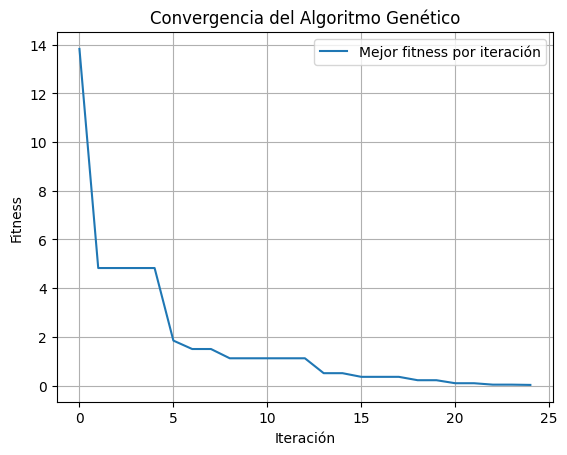

In [205]:
import matplotlib.pyplot as plt

# Imprimir la mejor solución y su fitness al finalizar
print("Mejor solución encontrada:", best_solution)
print("Fitness de la mejor solución:", best_fitness)

# Graficar la convergencia (mejor fitness por iteración)
plt.figure()
plt.plot(best_fitness_per_iteration, label='Mejor fitness por iteración')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.title('Convergencia del Algoritmo Genético')
plt.legend()
plt.grid(True)
plt.show()